Custom tree visualization
==

This page demonstrates custom tree visualization options available in the Python API, including custom colormaps, and may be used for developing visualizations in a Jupyter notebook.
See [docs page](https://matsengrp.github.io/gctree/stubs/gctree.CollapsedTree.html#gctree.CollapsedTree.render) on the `CollapsedTree.render()` method for more details.

Import packages

In [1]:
import gctree
import pickle
import numpy as np

Load an inferred `CollapsedTree` object from a pickle file (such as are output by the `gctree` CLI)

In [2]:
with open("gctree.out.inference.1.p", "rb") as f:
    tree = pickle.load(f)

The default tree rendering
--

Note that the special file name `"%%inline"` allows rendering in the notebook. To render to a file, supply a filename instead, e.g. `"tree1.svg"`

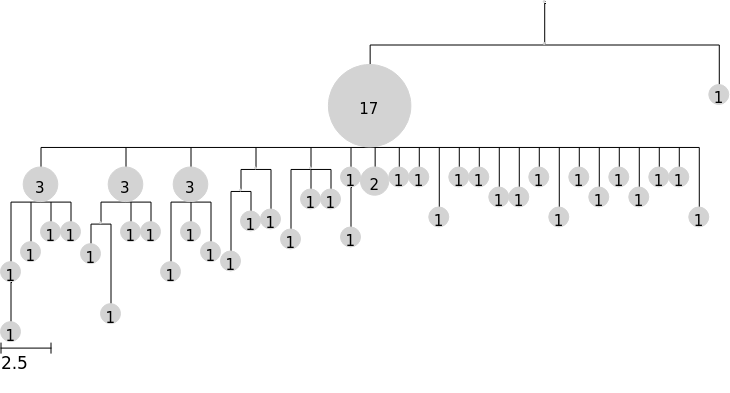

In [3]:
tree.render("%%inline")

Rendering arguments
--

Use the `scale` argument to make the tree taller

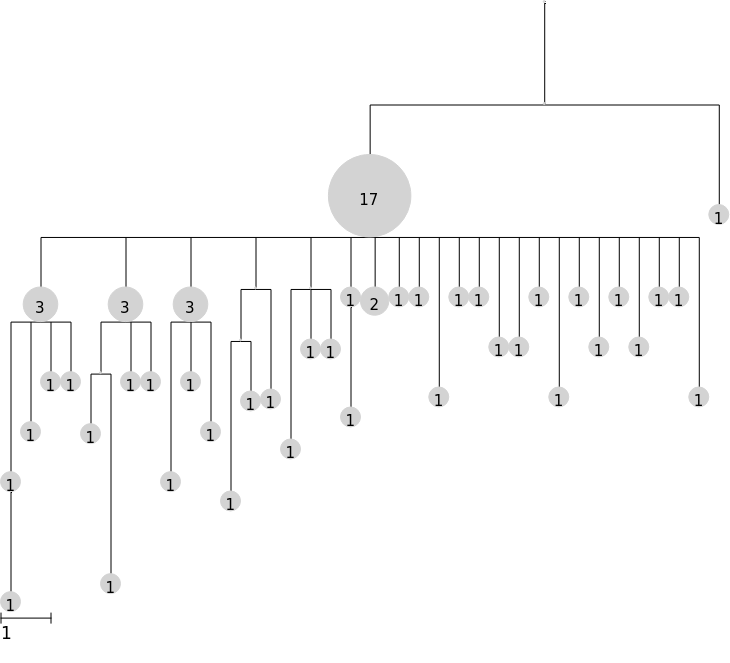

In [4]:
tree.render("%%inline", scale=50)

Use the `branch_margin` argument to compress (negative) or expand (positive) tree width

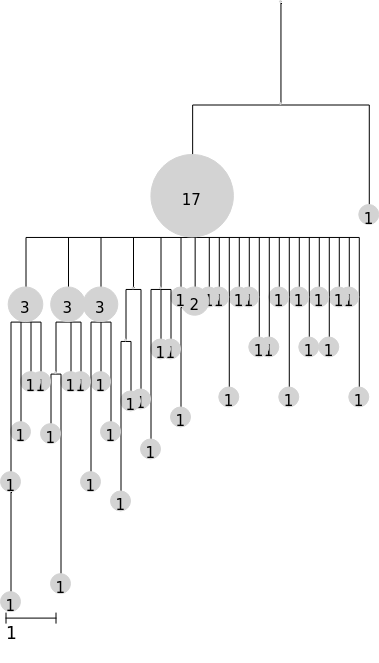

In [5]:
tree.render("%%inline", scale=50, branch_margin=-10)

Instead of the default node sizing by abundance, set a fixed size with the `node_size` argument

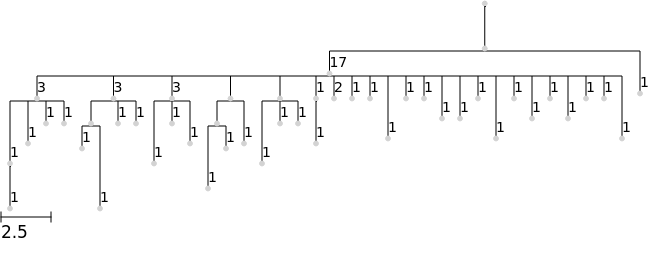

In [6]:
tree.render("%%inline", node_size=5)

To make nodes disappear (e.g. for consistent root-to-tip heights) you can set `node_size=0`

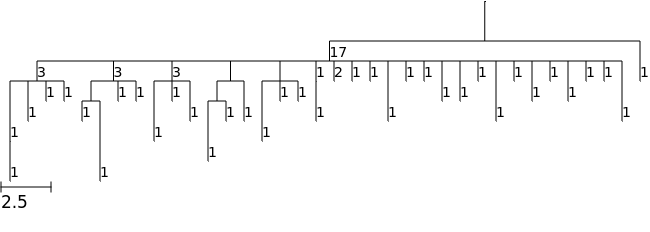

In [7]:
tree.render("%%inline", node_size=0)

Coloring nodes
--

The argument `colormap` can be used to customize the colors of nodes.
You can supply a dictionary with node names as keys and with values that are [color names in ETE](http://etetoolkit.org/docs/latest/reference/reference_treeview.html#ete3.SVG_COLORS) or RGB hex values.

Here we will instead demonstrate how to use a custom colormap based on a numerical node feature. We will use node abundance feature (which all gctree trees have) in this example, and will use the `"viridis"` palette for our color range. You can use other named palettes shown [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

We first obtain the color map based on the abundance feature, and then supply this as the `colormap` argument when rendering.
See [docs page](https://matsengrp.github.io/gctree/stubs/gctree.CollapsedTree.html#gctree.CollapsedTree.feature_colormap) on the `CollapsedTree.feature_colormap()` method for more details.

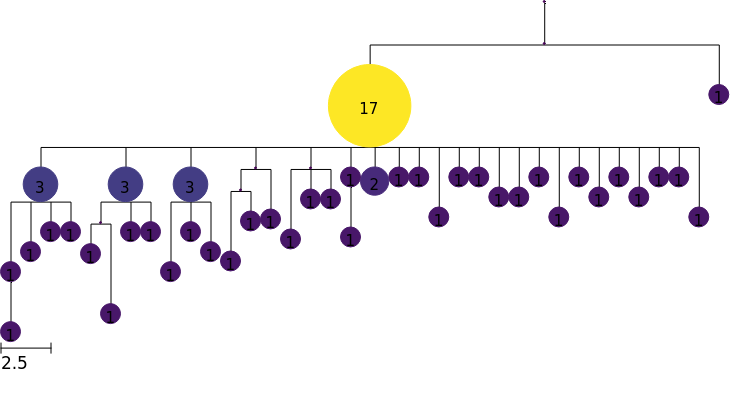

In [8]:
colormap = tree.feature_colormap("abundance")
tree.render("%%inline", colormap=colormap)

### Local branching statistics

We might want to color by other node attributes, and here we show how to compute the local branching index (LBI) [(Neher et al., 2014)](https://elifesciences.org/articles/03568) to measure "bushiness", which may be associated with fitness.

- The method `local_branching()` computes LBI for all nodes in our tree, and assigns them as tree features. See [docs page](https://matsengrp.github.io/gctree/stubs/gctree.CollapsedTree.html#gctree.CollapsedTree.local_branching) on the `CollapsedTree.local_branching()` method for more details.
- We then create a colormap based on these features.
- Finally, we use this colormap to render a tree with nodes colored by LBI

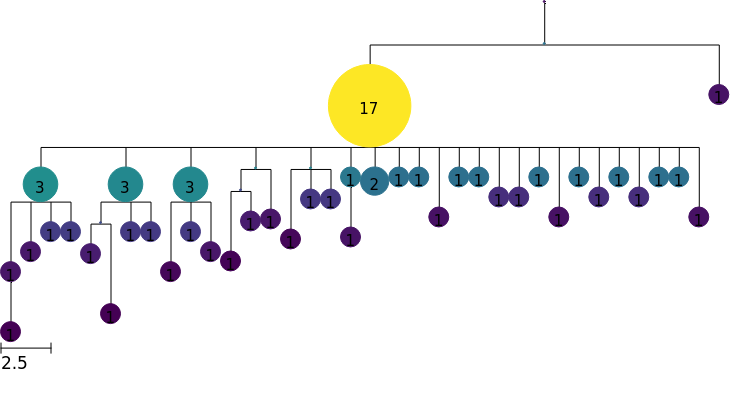

In [9]:
tree.local_branching()
colormap = tree.feature_colormap("LBI")
tree.render("%%inline", colormap=colormap)

### Custom node features

We can use any numerical node feature to color our tree. For example, we might have affinity estimates for each node.

In this example, we assign random values as node features to create artificial affinity data. With real data, we would assign values based on the `node.name` or `node.sequence` of each node.

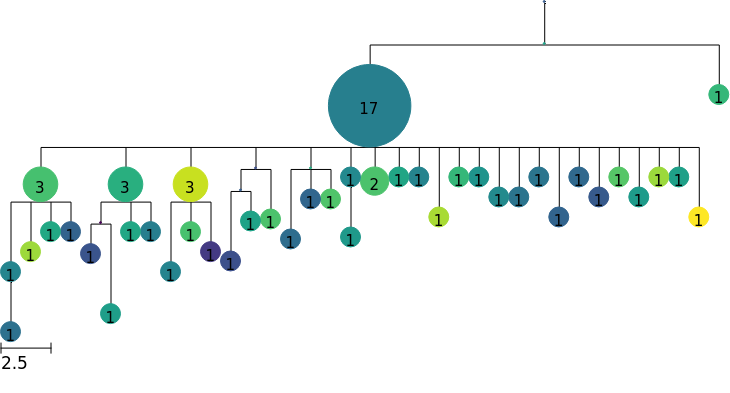

In [10]:
for node in tree.tree.traverse():
    node.add_feature("affinity", np.random.randn())

colormap = tree.feature_colormap("affinity")
tree.render("%%inline", colormap=colormap)